### Descriptive Statistics:
 - Obtain basic statistics for textual lengths (like headline length).
 - Count the number of articles per publisher to identify which publishers are most active.
 - Analyze the publication dates to see trends over time, such as increased news frequency on particular days or during specific events.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import os
import sys

In [4]:
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)

In [5]:
# Reading file from Data folder
df = pd.read_csv('../Data/raw_analyst_ratings.csv')

In [59]:
# Checking the first ten records
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [60]:
# Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [61]:
# 1. Descriptive Statistics on Headline Length
df['headline_length'] = df['headline'].apply(len)
headline_stats = df['headline_length'].describe()
print("Headline Length Statistics:")
print(headline_stats)

Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [33]:
# 2. Article Count per Publisher
publisher_counts = df['publisher'].value_counts()
print("\nNumber of Articles per Publisher:")
print(publisher_counts)


Number of Articles per Publisher:
publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64


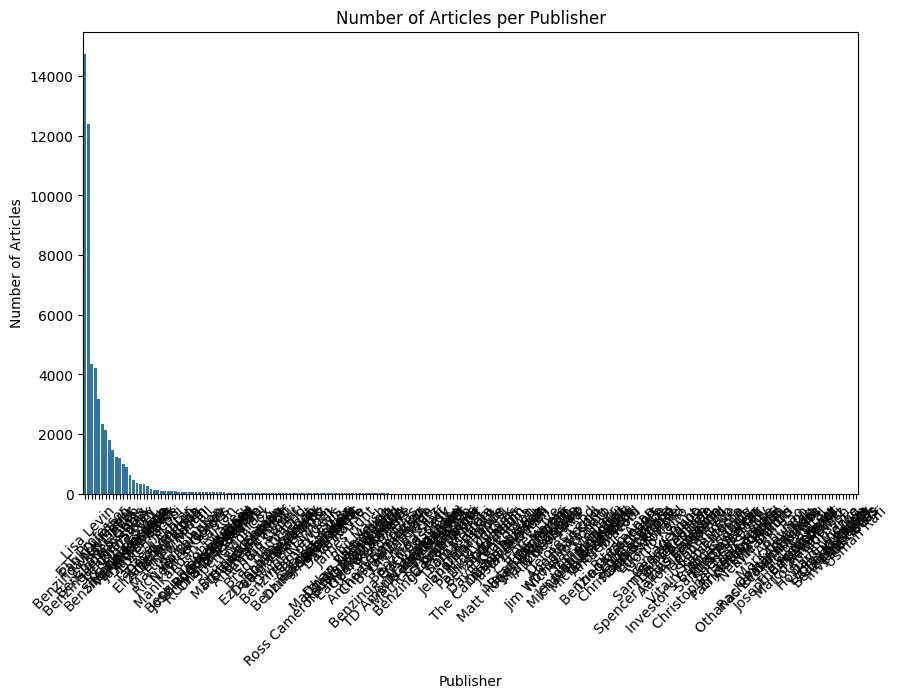

In [65]:
# Plot the article count per publisher
plt.figure(figsize=(10, 6))
sns.barplot(x=publisher_counts.index, y=publisher_counts.values)
plt.title('Number of Articles per Publisher')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

In [35]:
# 3. Analysis of Publication Dates
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check if the conversion was successful and drop rows where conversion failed
df = df.dropna(subset=['date'])

# Group by day and count the number of articles published
daily_counts = df.groupby(df['date'].dt.date).size()

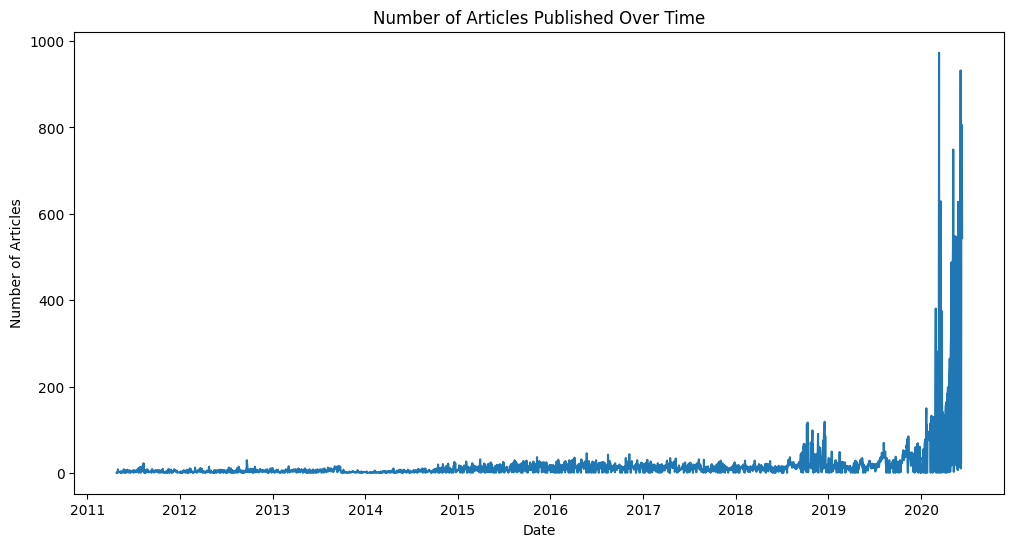

In [36]:
# Display the daily publication trend
plt.figure(figsize=(12, 6))
daily_counts.plot()
plt.title('Number of Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

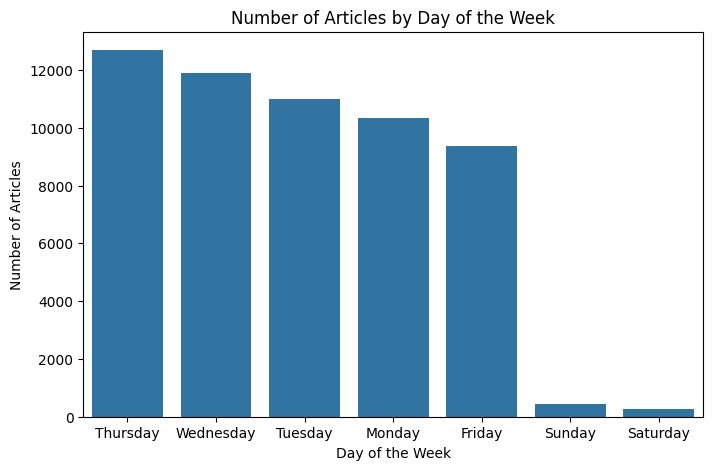

In [37]:
# Analyze trends by day of the week
df['day_of_week'] = df['date'].dt.day_name()
day_of_week_counts = df['day_of_week'].value_counts()

# Plot the number of articles by day of the week
plt.figure(figsize=(8, 5))
sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts.values)
plt.title('Number of Articles by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.show()


### Text Analysis(Sentiment analysis & Topic Modeling):
 - Perform sentiment analysis on headlines to gauge the sentiment (positive, negative, neutral) associated with the news.
 - Use natural language processing to identify common keywords or phrases, potentially extracting topics or significant events (like "FDA approval", "price target", etc.).


In [1]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download necessary NLTK data
nltk.download('vader_lexicon')
nltk.download('stopwords')


import nltk
nltk.download('punkt')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Coop\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Coop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Coop\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_vader(text):
    return sia.polarity_scores(text)

# Apply sentiment analysis to the headlines
df['Sentiment_Scores'] = df['headline'].apply(get_sentiment_vader)

# Extract compound score for simplicity
df['Sentiment'] = df['Sentiment_Scores'].apply(lambda x: x['compound'])

# Categorize sentiment
df['Sentiment_Category'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Inspect the results
print(df[['headline', 'Sentiment', 'Sentiment_Category']].head())


                                            headline  Sentiment  \
0            Stocks That Hit 52-Week Highs On Friday      0.000   
1         Stocks That Hit 52-Week Highs On Wednesday      0.000   
2                      71 Biggest Movers From Friday      0.000   
3       46 Stocks Moving In Friday's Mid-Day Session      0.000   
4  B of A Securities Maintains Neutral on Agilent...      0.296   

  Sentiment_Category  
0            Neutral  
1            Neutral  
2            Neutral  
3            Neutral  
4           Positive  


In [62]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

# Download VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Coop\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [9]:
# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to determine sentiment
def analyze_sentiment(text):
    sentiment_scores = sia.polarity_scores(text)
    if sentiment_scores['compound'] >= 0.05:
        return 'positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis
df['sentiment'] = df['headline'].apply(analyze_sentiment)

# Display the DataFrame with sentiment
print(df[['headline', 'sentiment']])


                                                  headline sentiment
0                  Stocks That Hit 52-Week Highs On Friday   neutral
1               Stocks That Hit 52-Week Highs On Wednesday   neutral
2                            71 Biggest Movers From Friday   neutral
3             46 Stocks Moving In Friday's Mid-Day Session   neutral
4        B of A Securities Maintains Neutral on Agilent...  positive
...                                                    ...       ...
1407323             Top Narrow Based Indexes For August 29  positive
1407324  Recap: Wednesday's Top Percentage Gainers and ...  negative
1407325  UPDATE: Oppenheimer Color on China Zenix Auto ...   neutral
1407326  Oppenheimer Initiates China Zenix At Outperfor...   neutral
1407327  China Zenix Auto International Opens For Tradi...   neutral

[1407328 rows x 2 columns]


In [40]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Coop\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Coop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Coop\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Coop\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [72]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer



# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=10)

# Fit and transform the data
tfidf_matrix = tfidf.fit_transform(df['headline'])

# Get the feature names
feature_names = tfidf.get_feature_names_out()

# Sum the TF-IDF scores for each feature over all documents
sum_tfidf = tfidf_matrix.sum(axis=0)

# Extract keywords with their scores
keywords = [(feature_names[i], sum_tfidf[0, i]) for i in range(len(feature_names))]

# Sort keywords by their scores in descending order
keywords = sorted(keywords, key=lambda x: x[1], reverse=True)

# Display the keywords
keywords


[('stocks', 149539.63276889533),
 ('market', 94797.56614358166),
 ('shares', 93176.13094587867),
 ('earnings', 78328.18467453224),
 ('update', 75366.82945656453),
 ('vs', 65826.30649065398),
 ('reports', 64795.43142753384),
 ('eps', 62401.31322429098),
 ('est', 53859.726234428825),
 ('sales', 47344.86966130579)]

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Resample by day to see daily publication counts
df_daily = df.set_index('date').resample('D').size()

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(df_daily, marker='o', linestyle='-', color='b')
plt.title('Daily Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


ValueError: time data "2020-05-22 00:00:00" doesn't match format "%Y-%m-%d %H:%M:%S%z", at position 10. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [69]:

# Extract domains if publishers are email addresses
df['publisher_domain'] = df['publisher'].apply(lambda x: x.split('@')[-1] if '@' in x else x)

# Count contributions by publisher or domain
publisher_counts = df['publisher_domain'].value_counts()

# Display the top publishers
print(publisher_counts)

# Analyze the type of news reported (optional, depending on data availability)
# Example: Categorize headlines into groups like "Price Target", "Stock Movement", etc.
df['category'] = df['headline'].apply(lambda x: 'Price Target' if 'Price Target' in x else 'Stock Movement' if 'Moving' in x else 'Other')

# Group by publisher and category
category_analysis = df.groupby(['publisher_domain', 'category']).size().unstack(fill_value=0)

# Display the analysis
print(category_analysis)


publisher_domain
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
Mark Davis                1
janaviktoria              1
Kiana Danial              1
giovannimola              1
Jeremie Capron            1
Name: count, Length: 1024, dtype: int64
category          Other  Price Target  Stock Movement
publisher_domain                                     
47ertrends           18             0               0
AARP                  7             0               0
ABNNewswire          13             0               0
Aakin                 5             0               0
Aaron Jackson.Ed     16             0               0
...                 ...           ...             ...
tradermark         1651             0               8
tradingwithwaves      5             0               0
tsmartin              2             0               0
wallstreet1928        8             0    

In [45]:
df1 = pd.read_csv('../Data/AMZN_historical_data.csv')
df1.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0


In [46]:
# Check for missing data in the DataFrame
missing_data = df1.isna().sum()

# Display the missing data count for each column
print(missing_data)


Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [47]:
# Fill missing values with the previous value
df.fillna(method='ffill', inplace=True)

# Alternatively, drop rows with missing values
df.dropna(inplace=True)


C:\Users\Coop\AppData\Local\Temp\ipykernel_11012\1674027353.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [48]:
import talib

# Calculate Simple Moving Average (SMA)
df1['SMA'] = talib.SMA(df1['Close'], timeperiod=14)

# Calculate Relative Strength Index (RSI)
df1['RSI'] = talib.RSI(df1['Close'], timeperiod=14)

# Calculate Moving Average Convergence Divergence (MACD)
df1['MACD'], df1['MACD_signal'], df1['MACD_hist'] = talib.MACD(df1['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Check the DataFrame to see if indicators are added
df1.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,RSI,MACD,MACD_signal,MACD_hist
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [49]:
import pynance as pn

# Example: Fetching financial metrics
stock_data = pn.data.get('AAPL')  # Example for Apple stock data
print(stock_data.head())

# Calculate returns
df1['Returns'] = df1['Close'].pct_change()


                Open    High       Low   Close      Volume
Date                                                      
2024-08-29  230.1000  232.92  228.8800  229.79  51906297.0
2024-08-28  227.9200  229.86  225.6800  226.49  38052167.0
2024-08-27  225.9950  228.85  224.8900  228.03  35934559.0
2024-08-26  226.7600  227.28  223.8905  227.18  30602208.0
2024-08-23  225.6589  228.22  224.3300  226.84  38677250.0


In [54]:
from scripts.visualize_stock_data import visualize_stock_data
visualize_stock_data(df)

ModuleNotFoundError: No module named 'scripts.visualize_stock_data'

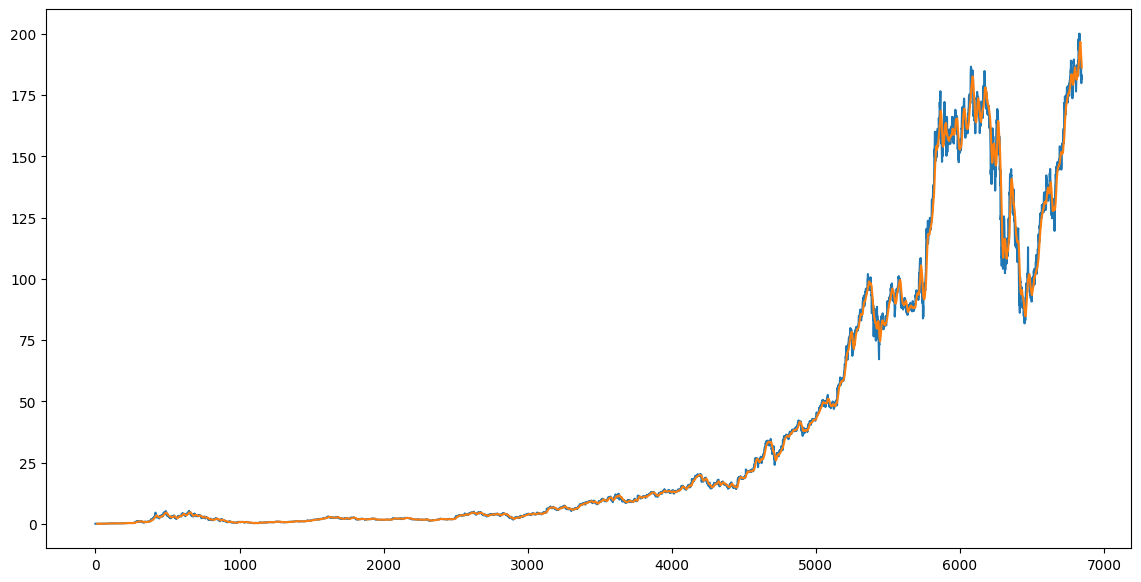

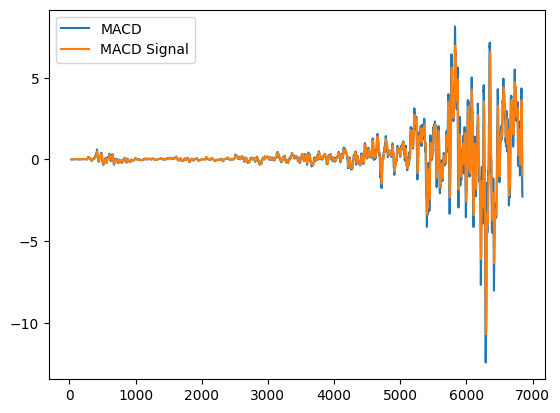

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Plot the closing price and SMA
plt.plot(df1['Close'], label='Close Price')
plt.plot(df1['SMA'], label='50-Day SMA')

# Plot MACD and signal line
plt.figure()
plt.plot(df1['MACD'], label='MACD')
plt.plot(df1['MACD_signal'], label='MACD Signal')

plt.legend()
plt.show()


In [ ]:
# Yaaliidha

In [ ]:
import pandas as pd
import numpy as np
import talib
import matplotlib.pyplot as plt

# Load stock prce data

df2['Date'] = pd.to_datetime(df2['date'])
df2.set_index('Date', inplace=True)

# Load analyst ratings data
# df = pd.read_csv('raw_analyst_ratings.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Merge the two datasets on the date
merged_data = pd.merge(df2, df, left_index=True, right_index=True, how='inner')

# Now you can perform your analysis
# Example: Calculate daily returns and analyze sentiment impact
merged_data['Return'] = merged_data['Close'].pct_change()

# Apply sentiment analysis on headlines (assuming sentiment is calculated separately)
# Here, we'll just add a placeholder for sentiment (e.g., -1 for negative, 0 for neutral, 1 for positive)
merged_data['Sentiment'] = np.random.choice([-1, 0, 1], size=len(merged_data))  # Placeholder for sentiment analysis

# Analyze the impact of sentiment on stock returns
positive_sentiment = merged_data[merged_data['Sentiment'] == 1]['Return'].mean()
negative_sentiment = merged_data[merged_data['Sentiment'] == -1]['Return'].mean()

print(f"Average return on positive sentiment: {positive_sentiment}")
print(f"Average return on negative sentiment: {negative_sentiment}")

# Visualize the data
plt.figure(figsize=(14, 7))

# Plot stock price and highlight based on sentiment
plt.plot(merged_data['Close'], label='Close Price')
plt.scatter(merged_data.index, merged_data['Close'], c=merged_data['Sentiment'], cmap='RdYlGn', label='Sentiment')

plt.title('Stock Price with Sentiment Analysis')
plt.legend()
plt.show()


KeyError: 'date'

In [ ]:
df2.head()

,Open,High,Low,Close,Volume,SMA,RSI,MACD,MACDSignal,MACDHist,Return
Date,,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800,NaN,NaN,NaN,NaN,NaN,-0.052171
1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000,NaN,NaN,NaN,NaN,NaN,-0.073398
1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600,NaN,NaN,NaN,NaN,NaN,0.024751
1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600,NaN,NaN,NaN,NaN,NaN,0.028992


In [ ]:
# YAALIIDHA

Correlation between sentiment and daily returns:
               sentiment  daily_return
sentiment           NaN           NaN
daily_return        NaN           NaN


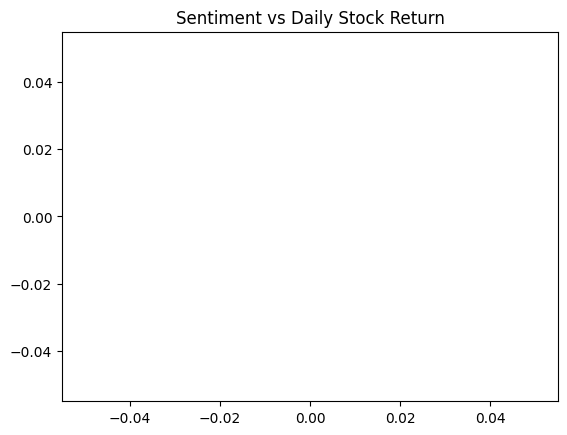

In [ ]:
import pandas as pd
from textblob import TextBlob

# Load your data (example format)
# news_df should contain 'date' and 'headline' columns
# stock_df should contain 'Date', 'Close', and other stock-related columns

# Ensure the 'date' columns are in datetime format
# df['Date'] = pd.to_datetime(df['Date']).dt.date
# df1['Date'] = pd.to_datetime(df1['Date']).dt.date

# Merge the datasets on the date
merged_df = pd.merge(df, df1, left_on='date', right_on='Date')

# Function to get sentiment from a headline
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Returns a score between -1 (negative) and 1 (positive)

# Apply sentiment analysis to headlines
merged_df['sentiment'] = merged_df['headline'].apply(get_sentiment)

# Calculate daily stock returns
merged_df['daily_return'] = merged_df['Close'].pct_change()

# Perform correlation analysis
correlation = merged_df[['sentiment', 'daily_return']].corr(method='pearson')
print("Correlation between sentiment and daily returns:\n", correlation)

# Optionally, visualize the data (if desired)
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=merged_df, x='sentiment', y='daily_return')
plt.title("Sentiment vs Daily Stock Return")
plt.show()
